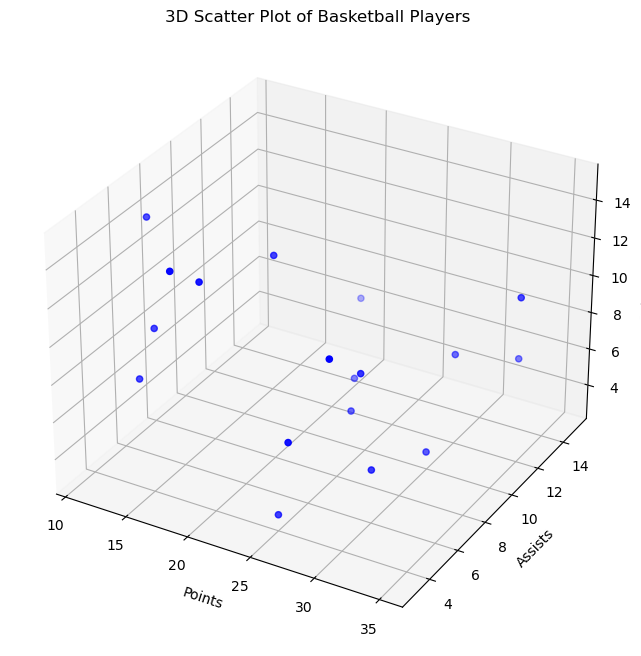

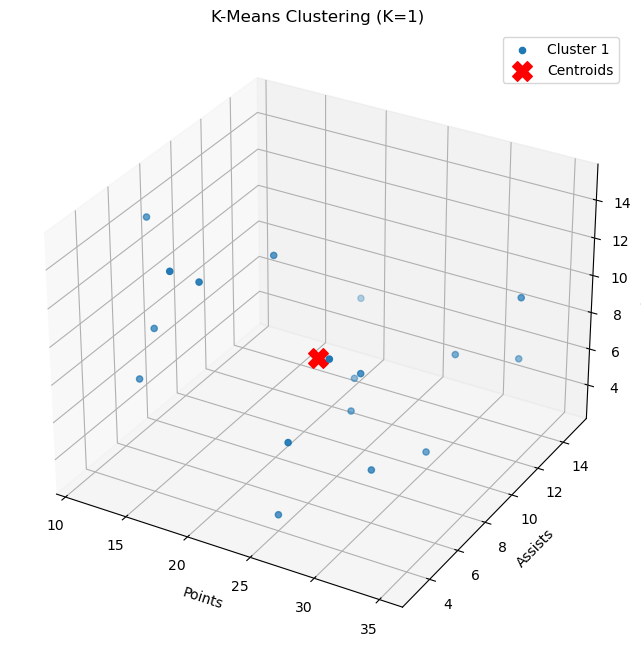

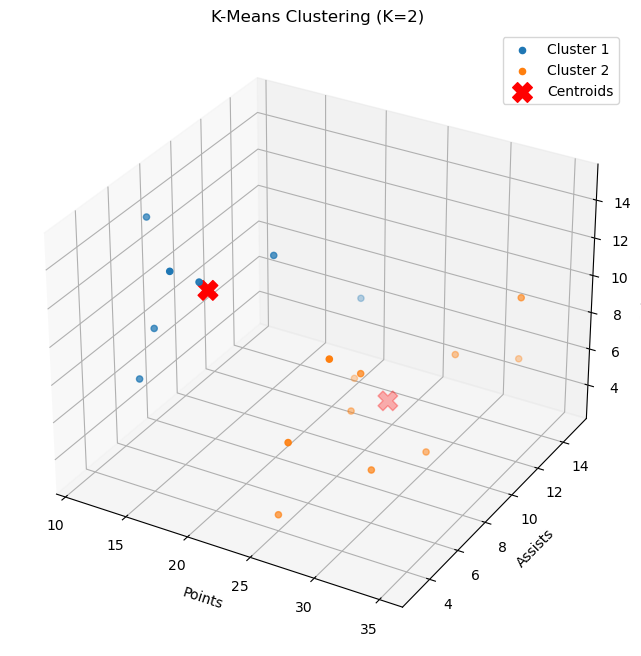

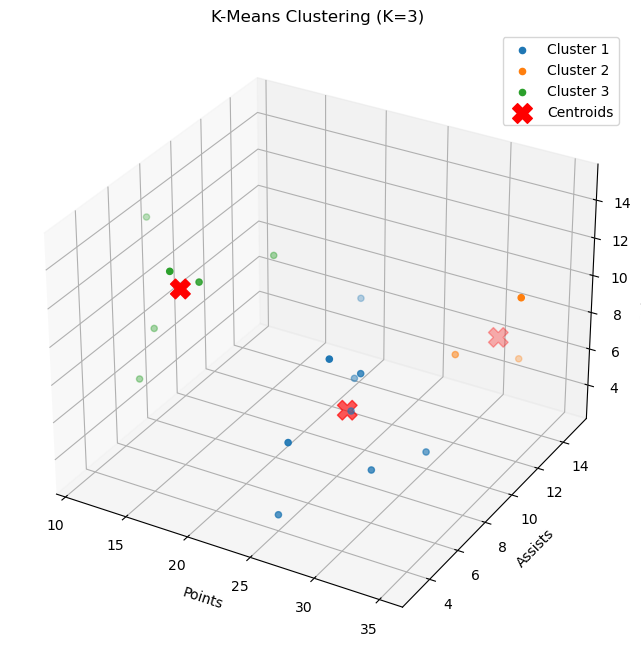

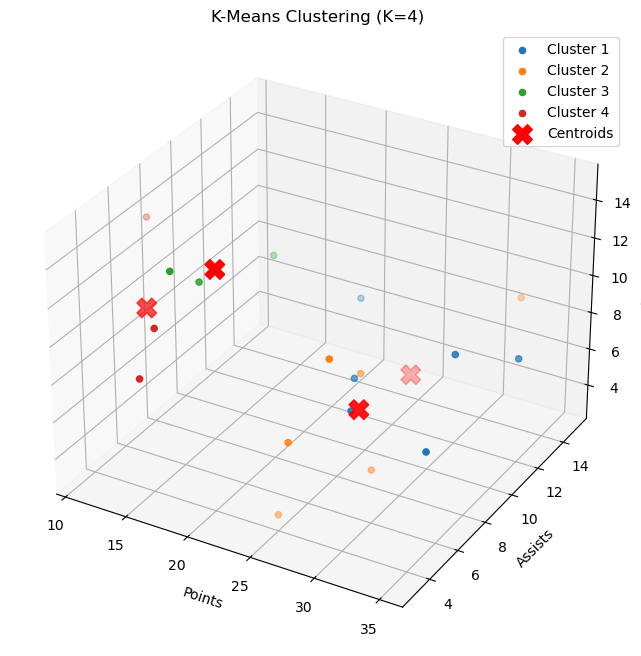

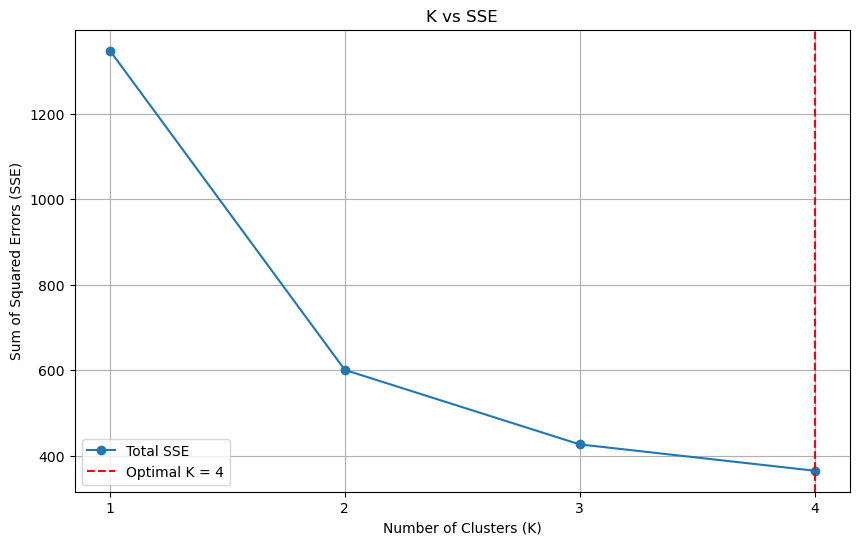

K=1
Iteration 1: SSE = 1347.50
Iteration 2: SSE = 1347.50


K=2
Iteration 1: SSE = 1189.45
Iteration 2: SSE = 904.31
Iteration 3: SSE = 777.56
Iteration 4: SSE = 601.00
Iteration 5: SSE = 601.00


K=3
Iteration 1: SSE = 462.05
Iteration 2: SSE = 426.92
Iteration 3: SSE = 426.92


K=4
Iteration 1: SSE = 406.80
Iteration 2: SSE = 393.25
Iteration 3: SSE = 365.33
Iteration 4: SSE = 365.33




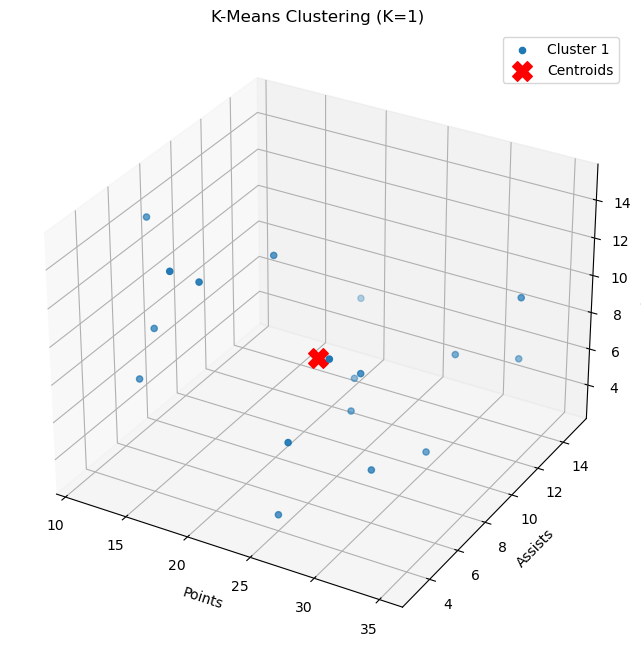

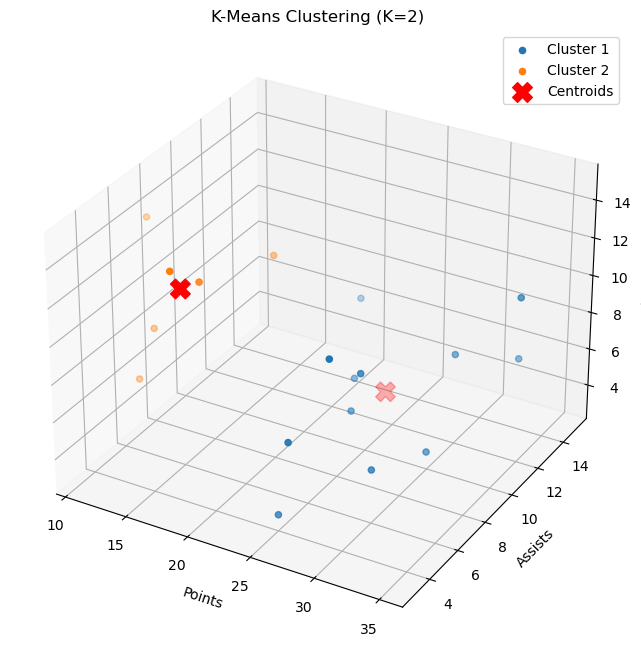

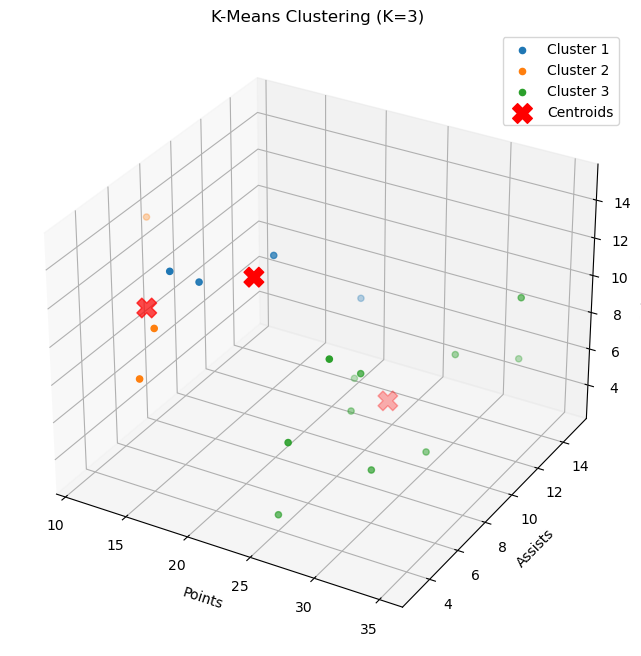

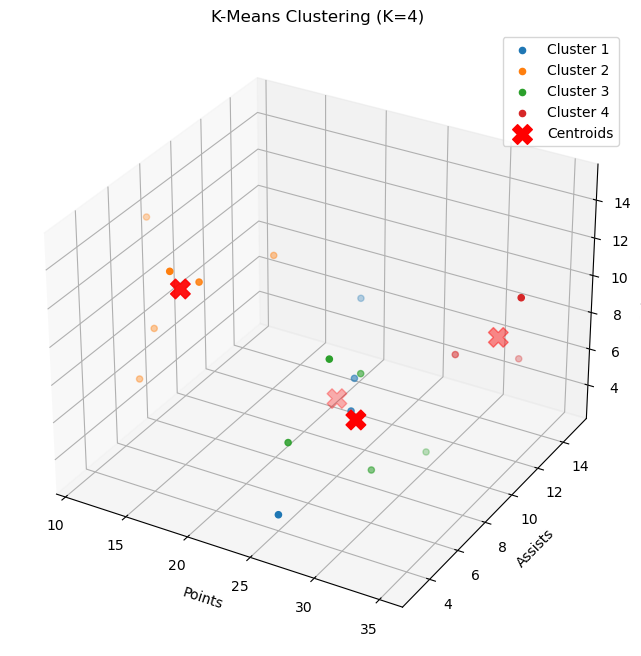

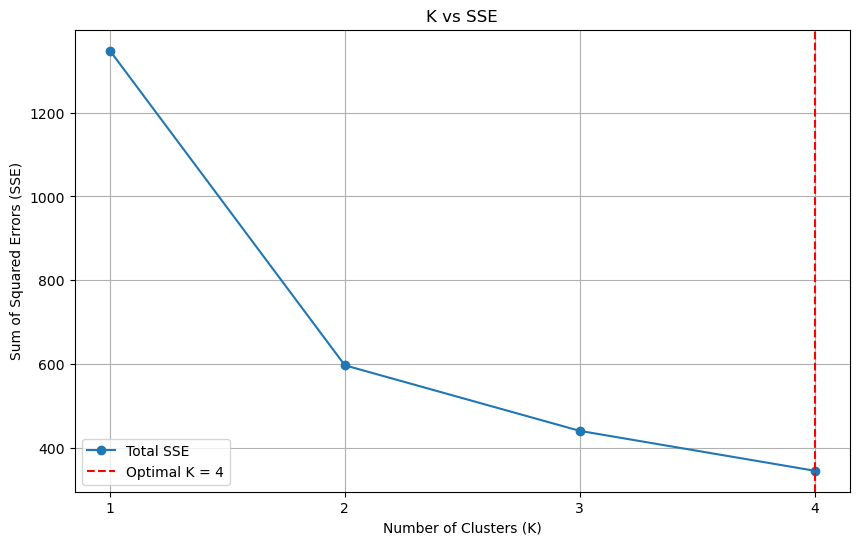

K=1
Iteration 1: SSE = 1347.50
Iteration 2: SSE = 1347.50


K=2
Iteration 1: SSE = 597.14
Iteration 2: SSE = 597.14


K=3
Iteration 1: SSE = 440.77
Iteration 2: SSE = 440.77


K=4
Iteration 1: SSE = 855.71
Iteration 2: SSE = 664.38
Iteration 3: SSE = 380.97
Iteration 4: SSE = 345.67
Iteration 5: SSE = 345.67




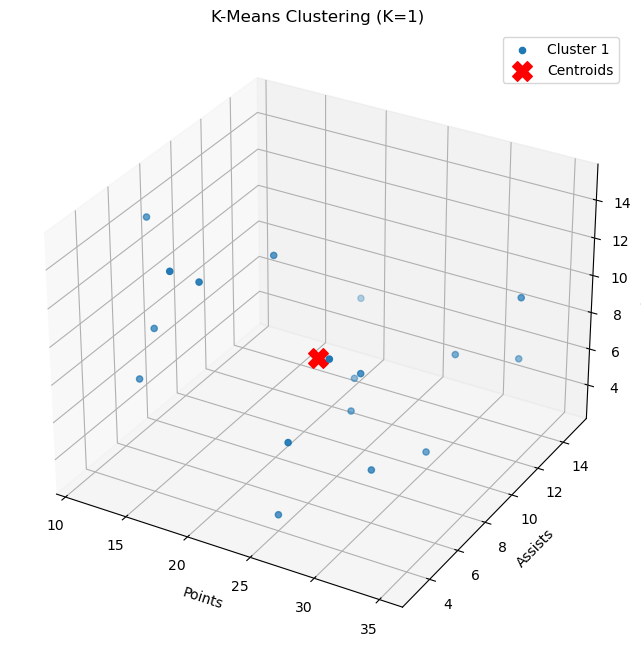

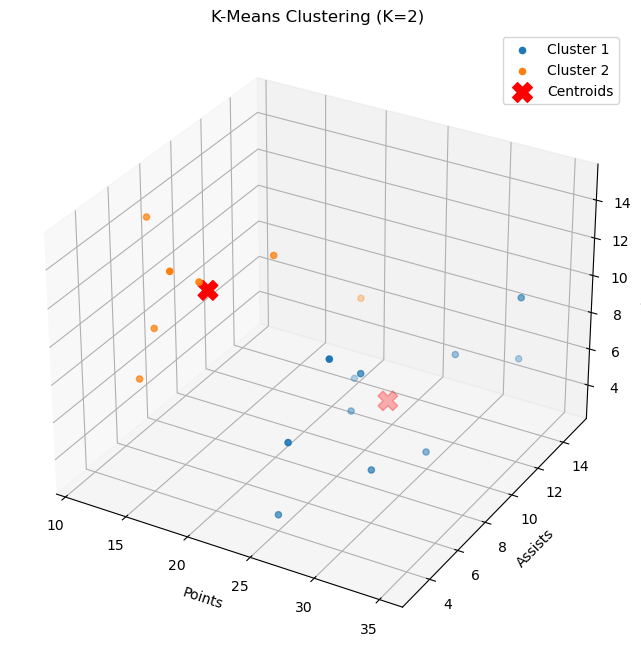

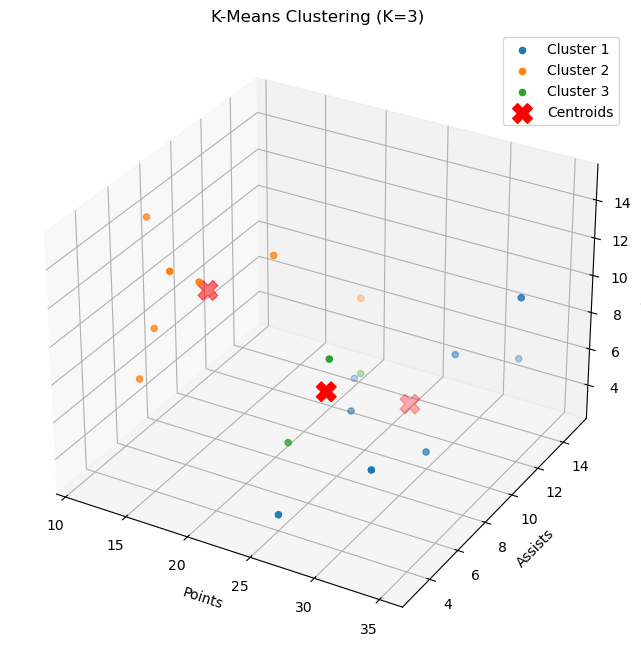

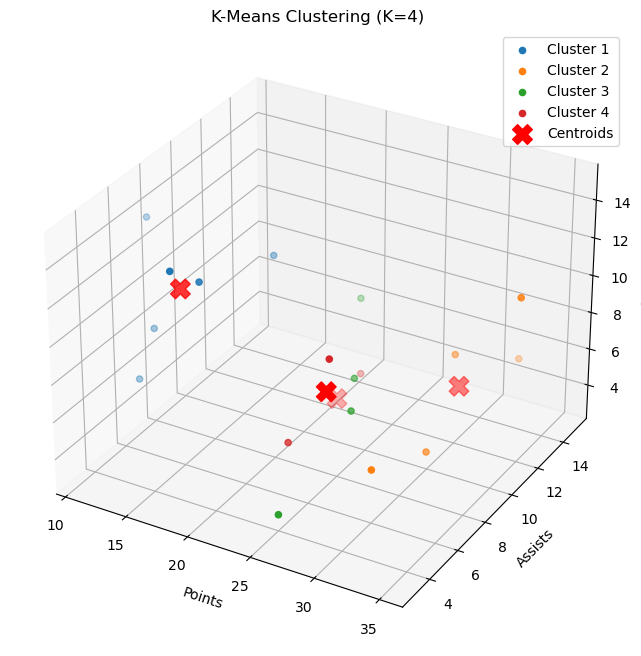

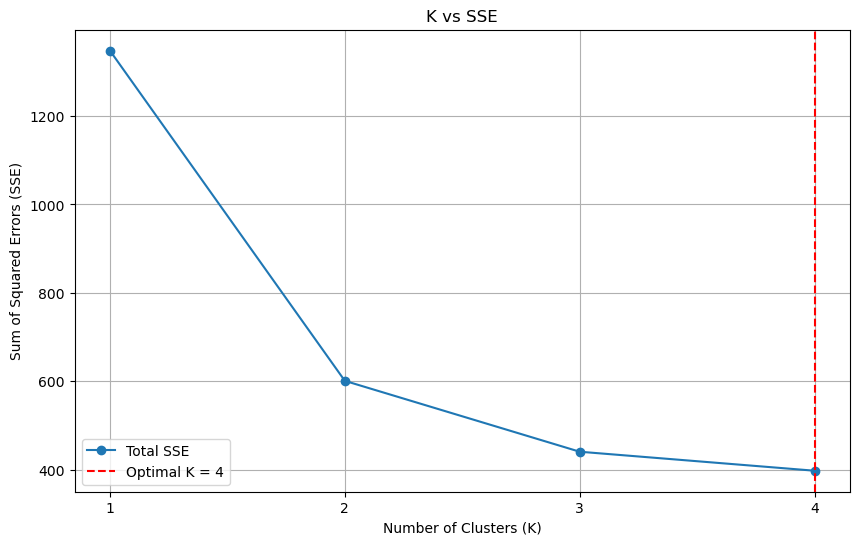

K=1
Iteration 1: SSE = 1347.50
Iteration 2: SSE = 1347.50


K=2
Iteration 1: SSE = 987.75
Iteration 2: SSE = 601.00
Iteration 3: SSE = 601.00


K=3
Iteration 1: SSE = 584.85
Iteration 2: SSE = 466.23
Iteration 3: SSE = 440.77
Iteration 4: SSE = 440.77


K=4
Iteration 1: SSE = 397.81
Iteration 2: SSE = 397.81




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create the DataFrame
data = {
    'points': [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0,
               33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    'assists': [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0,
                14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    'rebounds': [15, 14, 10, 8, 14, 13, 9, 5, 4, 11,
                 6, 5, 3, 8, 12, 7, 6, 5]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Step 2: K-means Algorithm Implementation
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):  # Default to p=3 for this example
    return np.sum(np.abs(a - b) ** p) ** (1/p)


def kmeans(data, k, distance_func, max_iterations=100):
    initial_centroids_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[initial_centroids_indices]
    
    sse_list = []
    
    for _ in range(max_iterations):
        clusters = {i: [] for i in range(k)}
        
        for point in data:
            distances = [distance_func(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)
        
        new_centroids = np.array([np.mean(clusters[i], axis=0) for i in range(k)])
        
        sse = calculate_sse(clusters, new_centroids)
        sse_list.append(sse)
        
        if np.array_equal(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids, sse_list

def calculate_sse(clusters, centroids):
    sse = 0
    for i in range(len(clusters)):
        for point in clusters[i]:
            sse += np.sum((point - centroids[i]) ** 2)
    return sse

# Convert DataFrame to numpy array
data_array = df.to_numpy()

# a. 3D Scatter plot of the data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['points'], df['assists'], df['rebounds'], color='blue')
ax.set_title('3D Scatter Plot of Basketball Players')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.show()

distance_functions = {
    'euclidean_distance': euclidean_distance,
    'manhattan_distance': manhattan_distance,
    'minkowski_distance': minkowski_distance
}


for name,distance_func in distance_functions.items():
    

    # Step 3: K-means Clustering and SSE Calculation
    sse_values = []
    k_values = [1, 2, 3, 4]

    # Store SSE for each iteration
    all_sse_iterations = []

    for k in k_values:
        clusters, centroids, sse_list = kmeans(data_array, k, distance_func)
        sse = calculate_sse(clusters, centroids)
        sse_values.append(sse)
        all_sse_iterations.append(sse_list)

    # Step 4: Visualization


    # b. Plot clusters for different K values
    for k in k_values:
        clusters, centroids, _ = kmeans(data_array, k, distance_func)  # Ignore the SSE list here

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i in range(k):
            cluster_points = np.array(clusters[i])
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')

        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='red', marker='X', s=200, label='Centroids')
        ax.set_title(f'K-Means Clustering (K={k})')
        ax.set_xlabel('Points')
        ax.set_ylabel('Assists')
        ax.set_zlabel('Rebounds')
        ax.legend()
        plt.show()


    # c. Plot SSE vs K with iteration details
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse_values, marker='o', label='Total SSE')
    plt.title('K vs SSE')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid()

    # d. Elbow method: showing optimal K
    optimal_k = k_values[np.argmin(sse_values)]
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.legend()
    plt.show()

    # e. Table of data points and their corresponding SSE for each iteration
    for k, sse_list in zip(k_values, all_sse_iterations):
        print(f"K={k}")
        for i, sse in enumerate(sse_list):
            print(f"Iteration {i + 1}: SSE = {sse:.2f}")
        print("\n")

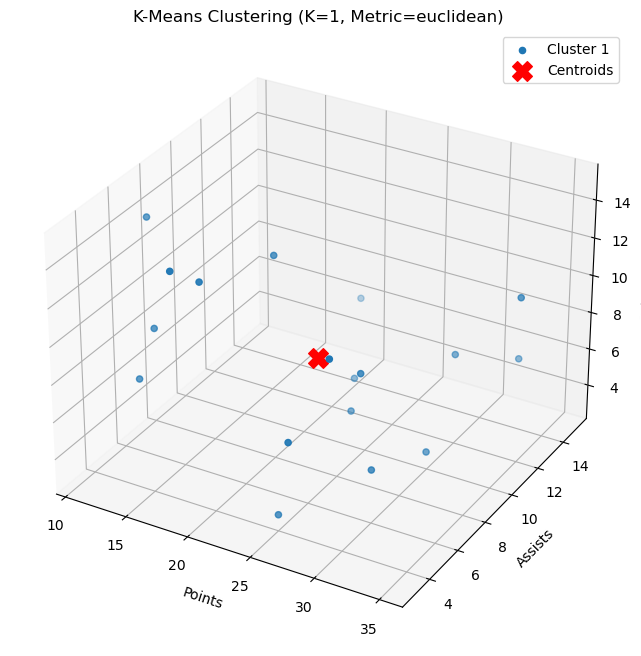

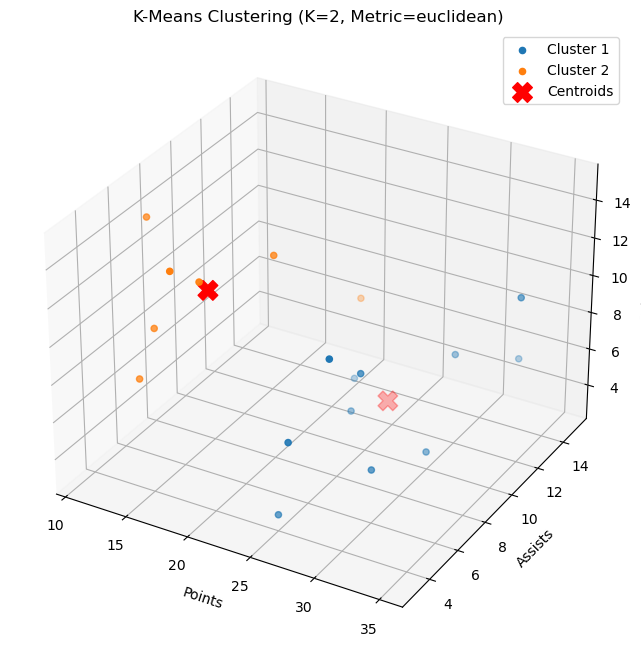

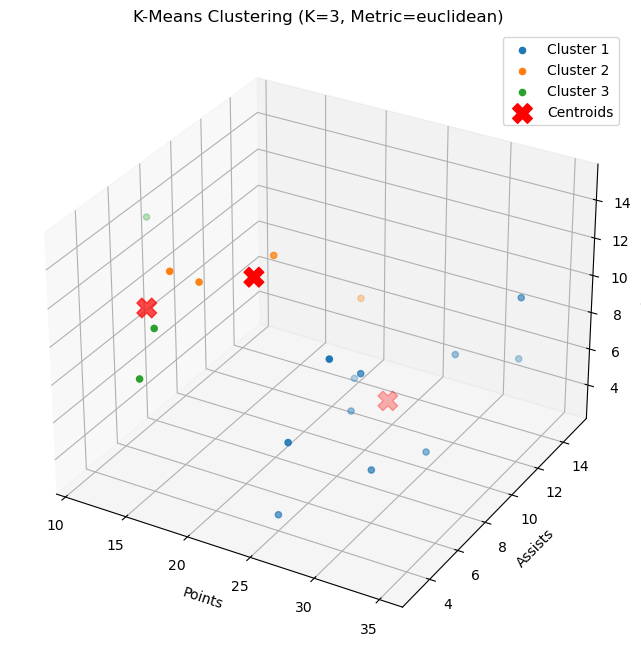

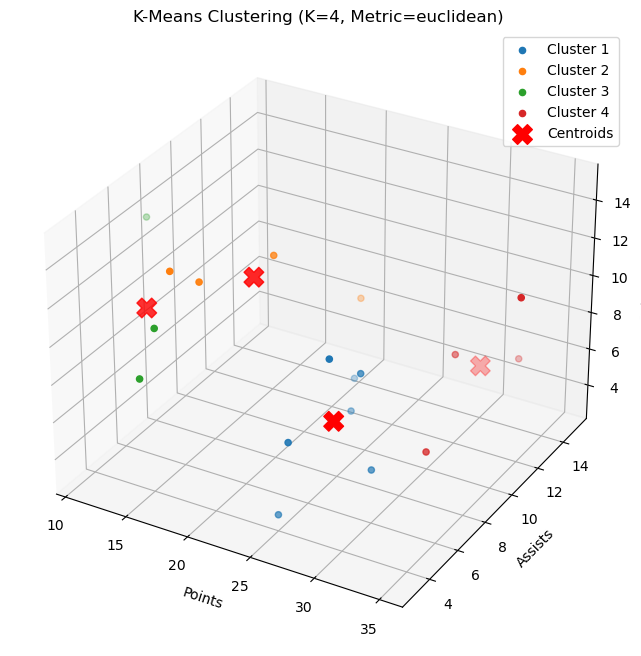

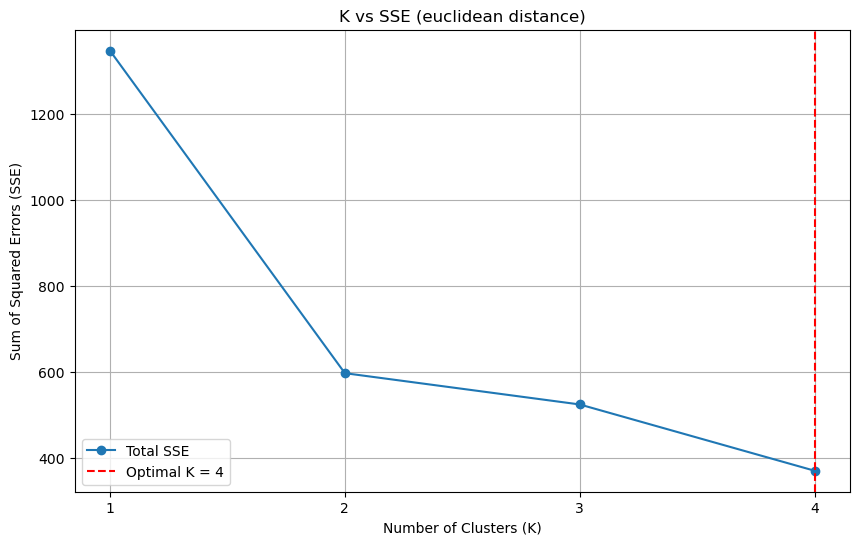

K=1, SSE=1347.50

K=2, SSE=597.14

K=3, SSE=524.33

K=4, SSE=370.12



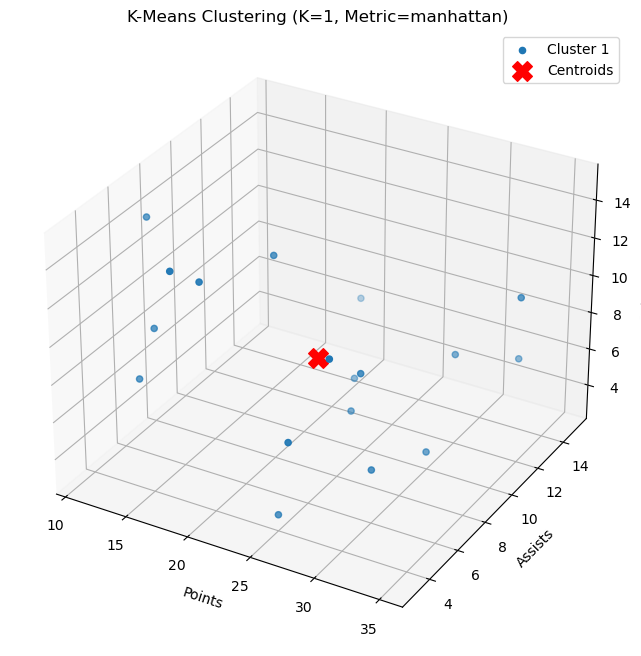

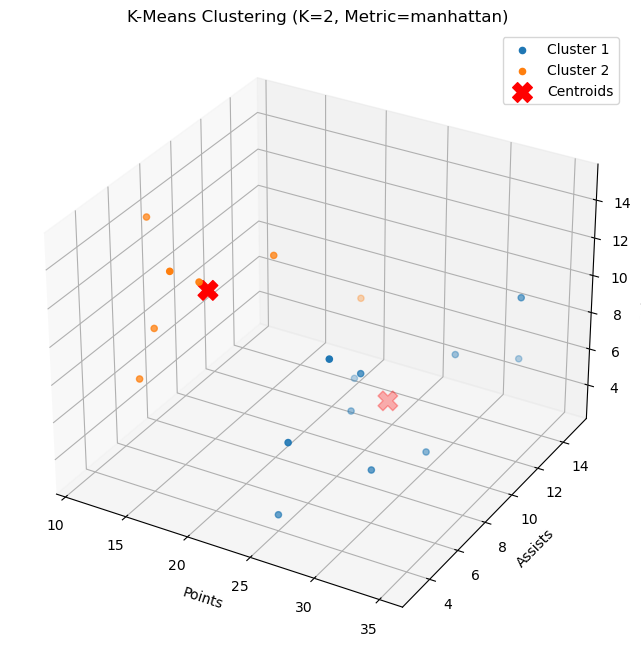

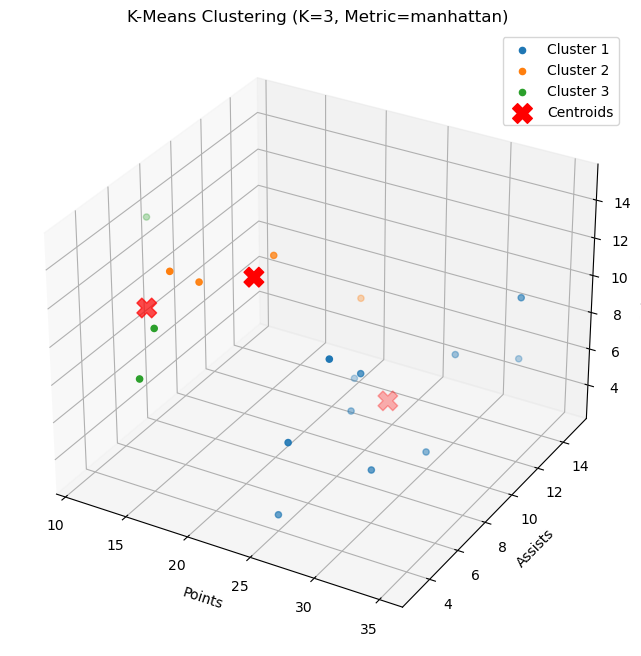

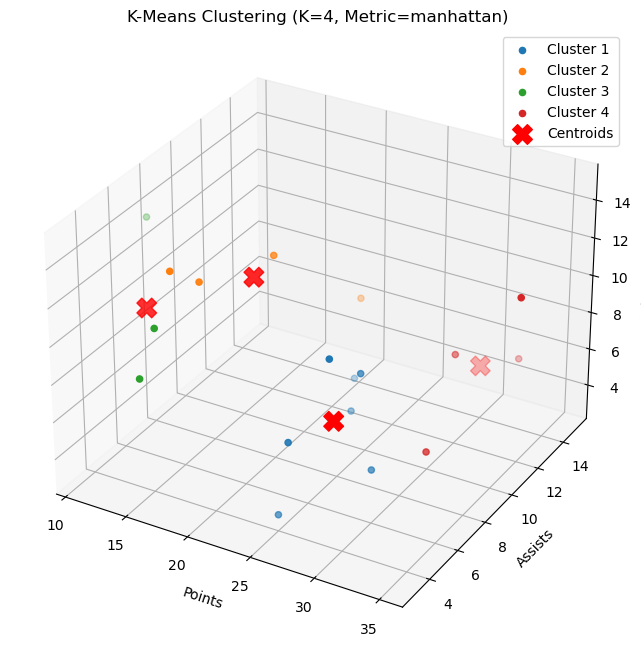

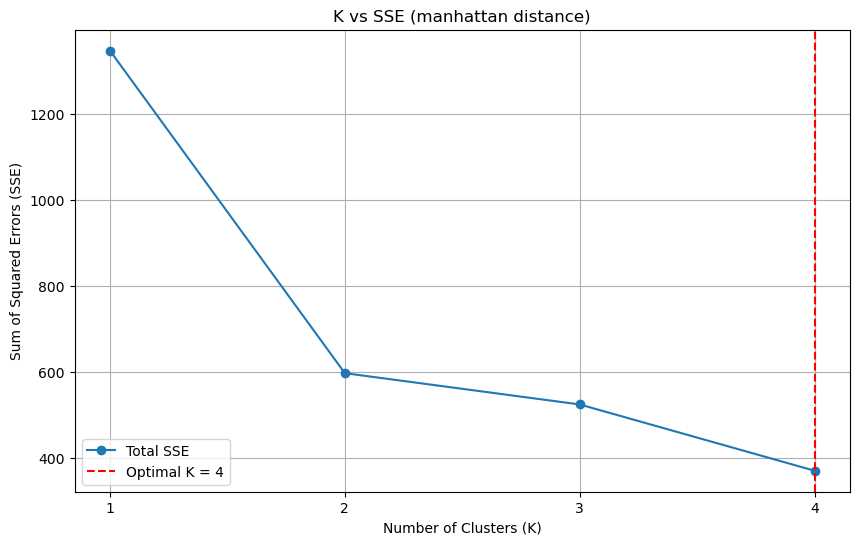

K=1, SSE=1347.50

K=2, SSE=597.14

K=3, SSE=524.33

K=4, SSE=370.12



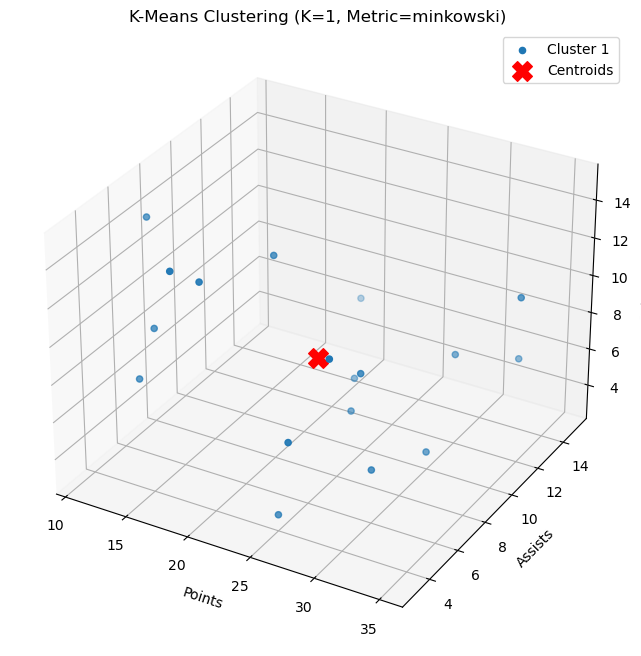

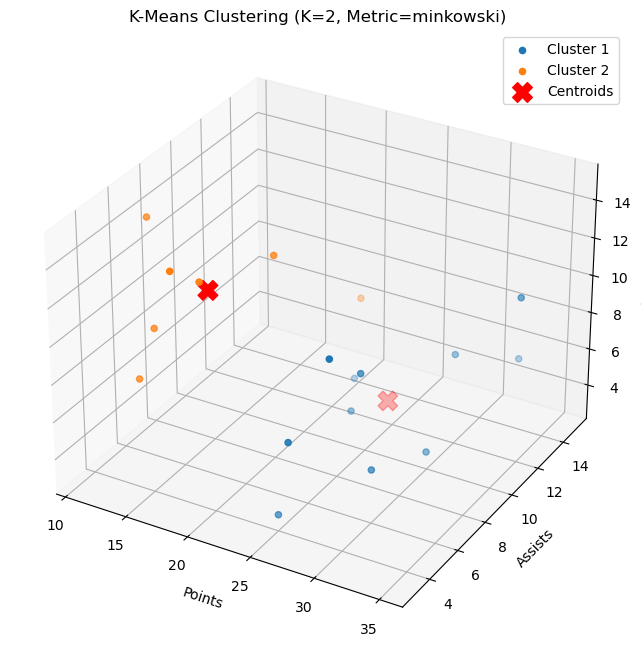

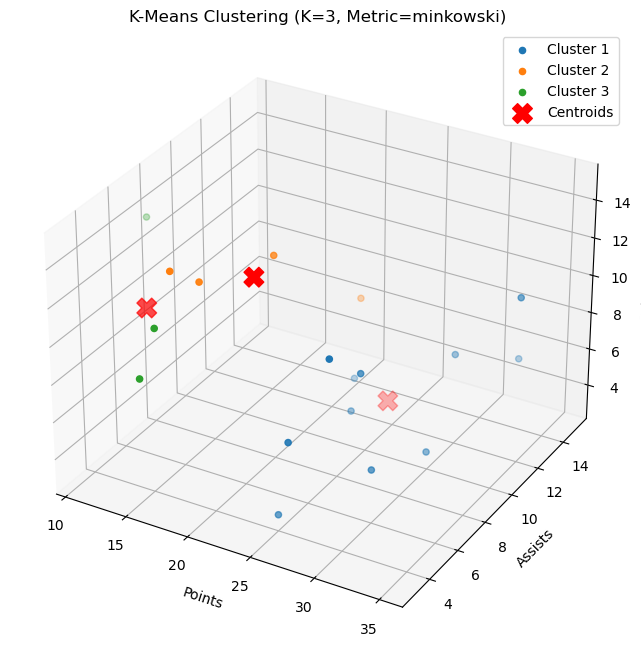

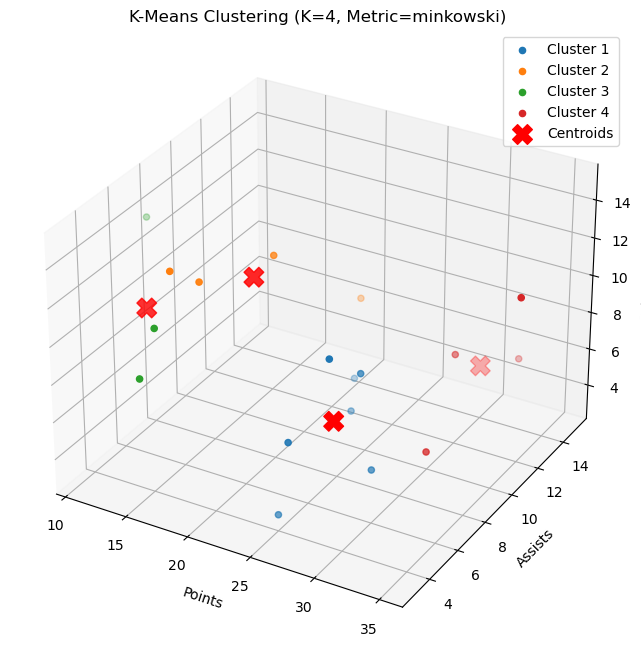

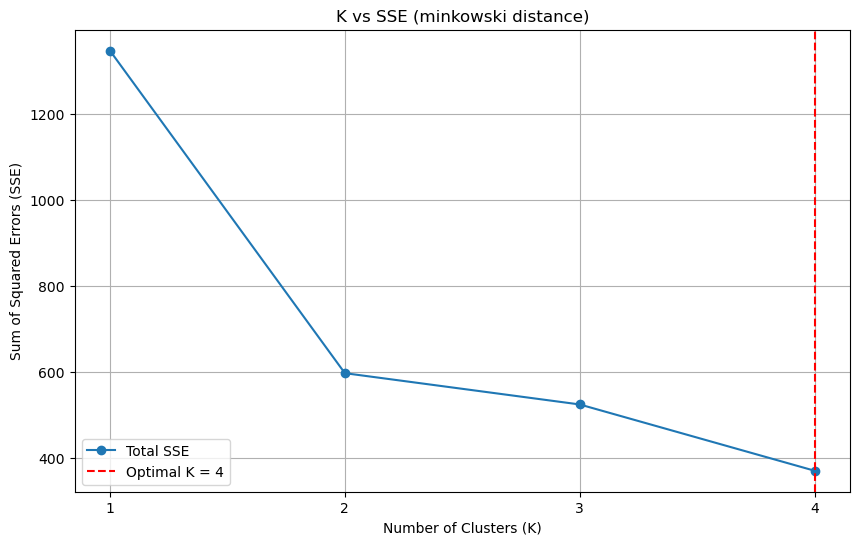

K=1, SSE=1347.50

K=2, SSE=597.14

K=3, SSE=524.33

K=4, SSE=370.12



In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


for name, metric in distance_functions.items():
    sse_values = []
    k_values = [1, 2, 3, 4]

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_array)
        
        sse = kmeans.inertia_  # SSE is the inertia_ attribute
        sse_values.append(sse)

        # b. Plot clusters for different K values (without original data points)
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot only the clustered points
        for i in range(k):
            cluster_points = data_array[kmeans.labels_ == i]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')

        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
                   color='red', marker='X', s=200, label='Centroids')
        ax.set_title(f'K-Means Clustering (K={k}, Metric={name})')
        ax.set_xlabel('Points')
        ax.set_ylabel('Assists')
        ax.set_zlabel('Rebounds')
        ax.legend()
        plt.show()

    # c. Plot SSE vs K with iteration details
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse_values, marker='o', label='Total SSE')
    plt.title(f'K vs SSE ({name} distance)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid()

    # d. Elbow method: showing optimal K
    optimal_k = k_values[np.argmin(sse_values)]
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.legend()
    plt.show()

    # e. Table of data points and their corresponding SSE for each iteration
    for k in k_values:
        print(f"K={k}, SSE={sse_values[k-1]:.2f}\n")